# Atividade Avaliativa 10 e 11

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

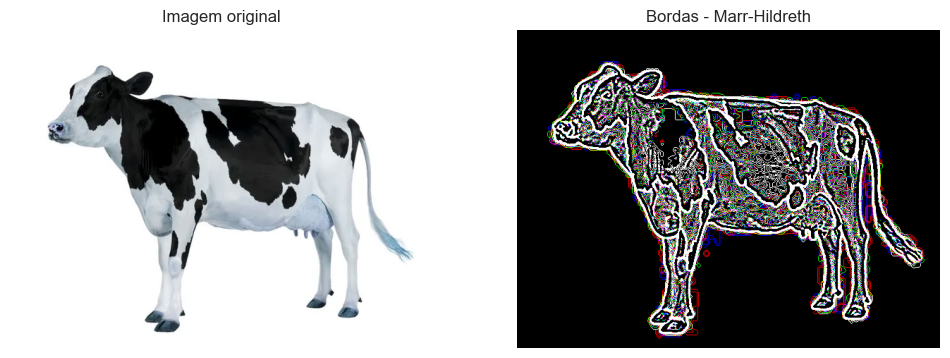

In [3]:
image_path = "Pratica1011/vaca.jpg"
image = cv2.imread(image_path)

# Primeiro vamos suavizar a imagem utilizando um filtro Gaussiano
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Segunda passo vamos aplicar a Laplaciana
laplacian = cv2.Laplacian(gaussian_blurred, cv2.CV_64F)

# No terceiro passo vamos normalizar e identificar o zero-crossings
laplacian_normalized = laplacian / np.max(np.abs(laplacian))
edges = np.zeros_like(laplacian, dtype=np.uint8)
edges[laplacian < 0] = 255 # isso vai destacar as bordas em branco

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Bordas - Marr-Hildreth')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

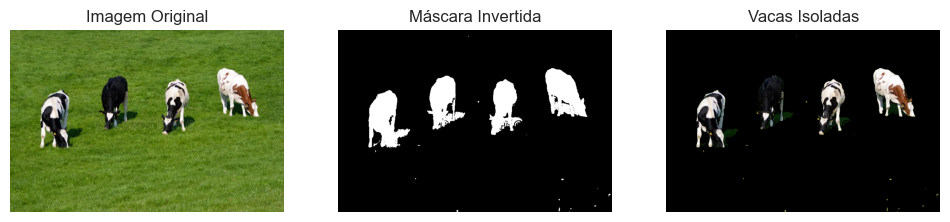

In [5]:
# Carregar a imagem
rebanho_image = cv2.imread("Pratica1011/rebanho.png")

# Converter a imagem para o espaço de cores HSV
hsv_image = cv2.cvtColor(rebanho_image, cv2.COLOR_BGR2HSV)

# Definir limites para o tom verde (valores podem variar dependendo da imagem)
lower_green = np.array([35, 50, 50])  # Limite inferior
upper_green = np.array([85, 255, 255])  # Limite superior

# Criar uma máscara para o tom verde
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Inverter a máscara para selecionar tudo exceto o fundo verde
mask_inv = cv2.bitwise_not(mask)

# Aplicar a máscara invertida na imagem original
cows_isolated = cv2.bitwise_and(rebanho_image, rebanho_image, mask=mask_inv)

# Mostrar os resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(cv2.cvtColor(rebanho_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Máscara Invertida")
plt.imshow(mask_inv, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Vacas Isoladas")
plt.imshow(cv2.cvtColor(cows_isolated, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


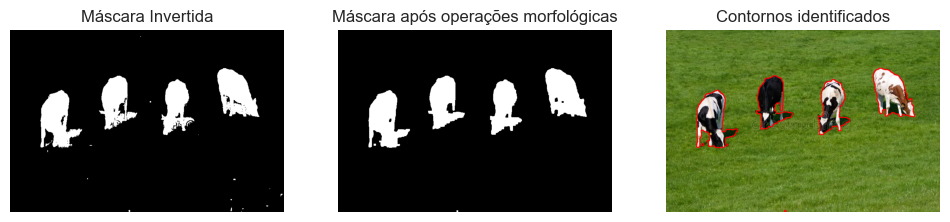

In [6]:
rebanho_image = cv2.imread('Pratica1011/rebanho.png')

hsv_image = cv2.cvtColor(rebanho_image, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

mask = cv2.inRange(hsv_image, lower_green, upper_green)
mask_inv = cv2.bitwise_not(mask)

# Até o momento o código foi igual ao bloco anterior. Agora vamos aplicar operações morfológicas para limpar e melhorar os contornos
kernel = np.ones((5,5), np.uint8)
mask_cleaned = cv2.morphologyEx(mask_inv, cv2.MORPH_CLOSE, kernel)
mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)

# Aplicadas as operações morfológicas, vamos encontrar os contornos e desenhá-los na imagem original
contours, _= cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_image = rebanho_image.copy()
cv2.drawContours(contours_image, contours, -1, (0, 0, 255), 2) # usaremos vermelho para o contorno

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('Máscara Invertida')
plt.imshow(mask_inv, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title('Máscara após operações morfológicas')
plt.imshow(mask_cleaned, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Contornos identificados')
plt.imshow(cv2.cvtColor(contours_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

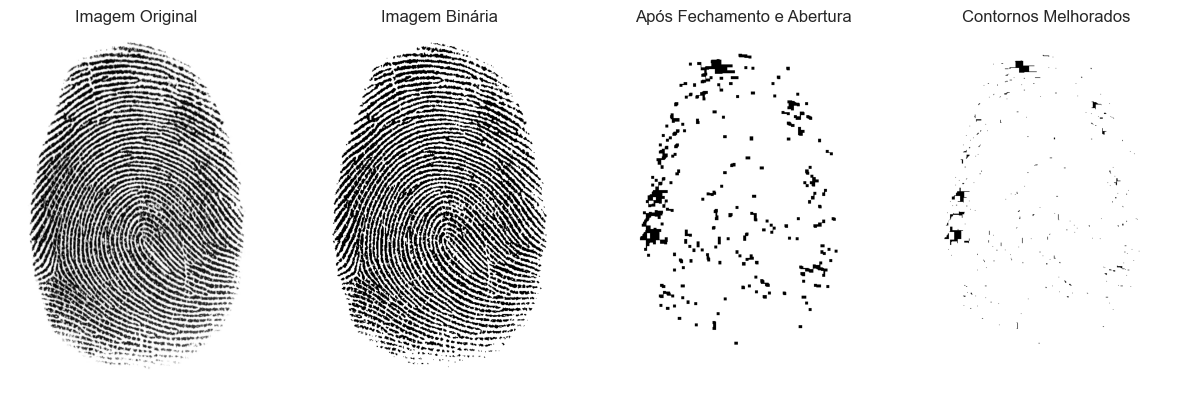

In [7]:
image_path_digital = 'Pratica1011/digital.jpg'
digital_image = cv2.imread(image_path_digital, cv2.IMREAD_GRAYSCALE)

# Vamos aplicar um limiar binário
_, binary_image = cv2.threshold(digital_image, 127, 255, cv2.THRESH_BINARY)

# Nesta etapa vamos criar um kernel para as operações morfológicas e, em seguida, aplicar as operações
kernel = np.ones((5,5), np.uint8)

# Aplicar operações morfológicas
# 1. Fechamento para preencher lacunas
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
# 2. Abertura para remover ruídos
opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)
# 3. Dilatação para melhorar contornos
dilated_image = cv2.dilate(opened_image, kernel, iterations=1)

plt.figure(figsize=(15, 7))
plt.subplot(1, 4, 1)
plt.title("Imagem Original")
plt.imshow(digital_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Imagem Binária")
plt.imshow(binary_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Após Fechamento e Abertura")
plt.imshow(opened_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Contornos Melhorados")
plt.imshow(dilated_image, cmap='gray')
plt.axis("off")

plt.show()

C:\Users\nasta\AppData\Local\Temp\ipykernel_12800\579255793.py:25: RuntimeWarning: overflow encountered in scalar subtract
  if segmented[nx, ny] == 0 and abs(int(image[nx, ny]) - pixel_value) < threshold:


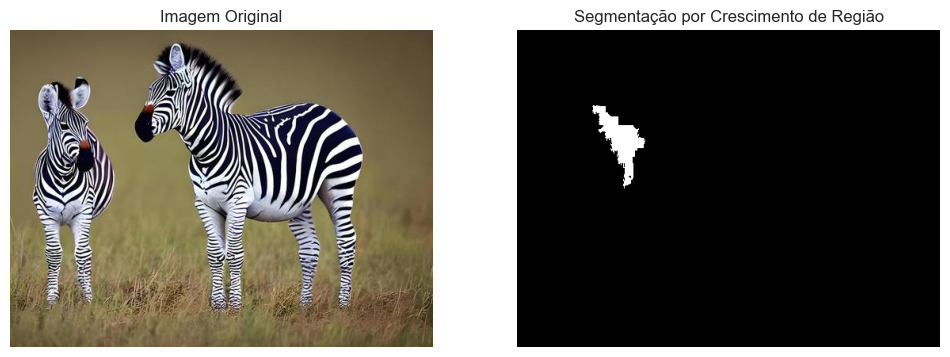

In [10]:
# Carregar a imagem
image_path_zebra = "Pratica1011/zebras.jpg"
zebra_image = cv2.imread(image_path_zebra)
gray_image = cv2.cvtColor(zebra_image, cv2.COLOR_BGR2GRAY)

# Configuração inicial do crescimento de região
seeds = [(100, 100)]  # Coordenadas iniciais de uma semente (ajustar conforme necessário)
threshold = 25  # Limite de intensidade para crescimento
output = np.zeros_like(gray_image)  # Imagem de saída

# Função para verificar vizinhos
def region_growing(image, seeds, threshold):
    height, width = image.shape
    segmented = np.zeros_like(image)
    for seed in seeds:
        stack = [seed]
        while stack:
            x, y = stack.pop()
            if segmented[x, y] == 0:
                segmented[x, y] = 255  # Marcar como parte da região
                pixel_value = image[x, y]
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < height and 0 <= ny < width:
                        if segmented[nx, ny] == 0 and abs(int(image[nx, ny]) - pixel_value) < threshold:
                            stack.append((nx, ny))
    return segmented

# Aplicar o crescimento de região
segmented_image = region_growing(gray_image, seeds, threshold)

# Mostrar os resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(cv2.cvtColor(zebra_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmentação por Crescimento de Região")
plt.imshow(segmented_image, cmap='gray')
plt.axis("off")

plt.show()